In [76]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
df_match = pd.read_csv('dataset.csv')
all_match_attributes=df_match.columns.values.tolist()
after_match_attributes =['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
before_match_attributes = list(set(all_match_attributes) - set(after_match_attributes))
before_match_all=before_match_attributes+['possession_home']
df_before_match = df_match[before_match_all]

In [31]:
holdout_per=0.2
df_before_match_out_sample = df_before_match.sample(frac=holdout_per)
df_before_match_out_testtarget = df_before_match_out_sample['possession_home']
df_before_match_out_test =df_before_match_out_sample[before_match_attributes]

df_before_match_out_left = df_before_match.iloc[list(set(df_before_match.index.values.tolist())-set(df_before_match_out_sample.index.values.tolist()))]
df_before_match_out_training = df_before_match_out_left[before_match_attributes]
df_before_match_out_trainingtarget = df_before_match_out_left['possession_home']

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.3s finished

[2017-11-12 14:22:55] Features: 1/41 -- score: -58.6330325191[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished

[2017-11-12 14:22:55] Features: 2/41 -- score: -53.398419051[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.5s finished

[2017-11-12 14:22:56] Features: 3/41 -- score: -52.3320985494[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.5s finished

[2017-11-12 14:22:56] Features: 4/41 -- score: -51.1035598977[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.5s finished

[2

[2017-11-12 14:23:24] Features: 40/41 -- score: -52.1542641269[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2017-11-12 14:23:24] Features: 41/41 -- score: -52.8044543551

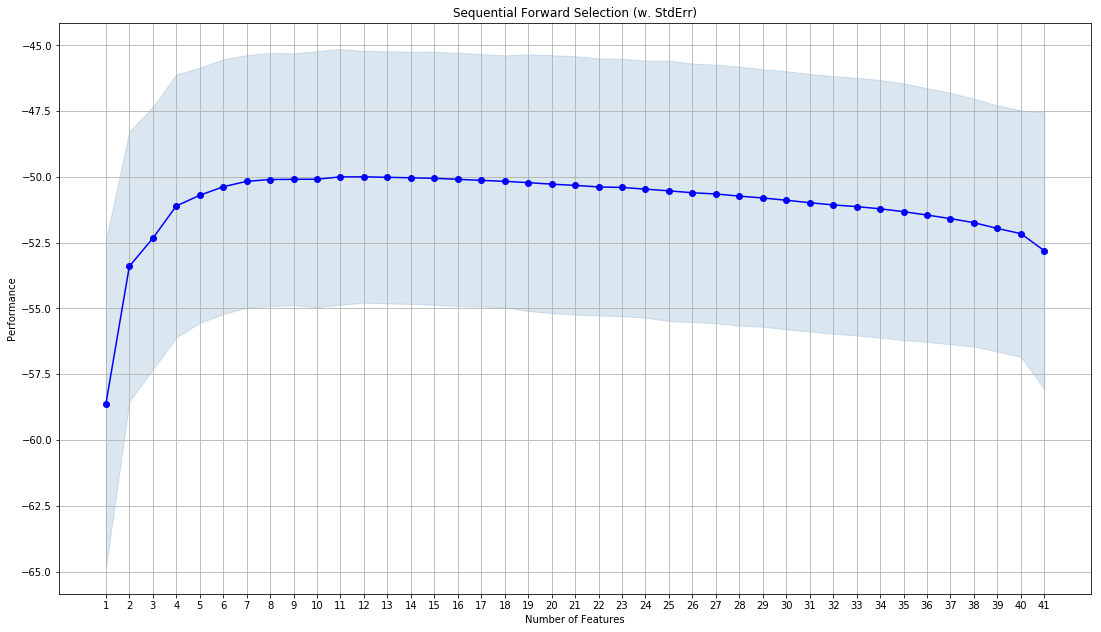

In [32]:
lr = linear_model.LinearRegression()
sfs_greedy = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_greedy = sfs_greedy.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_greedy.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [35]:
df_features_forward_greedy = pd.DataFrame.from_dict(sfs_greedy.get_metric_dict()).T
df_features_forward_greedy

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-58.633,13.8777,"[-43.6548974593, -37.7276555364, -36.680368159...","(12,)",18.6852,6.2284
2,-53.3984,11.429,"[-40.9859170164, -35.2146386638, -35.624896262...","(34, 12)",15.3882,5.12939
3,-52.3321,11.1248,"[-44.8147842555, -36.7779508376, -33.961982038...","(34, 12, 29)",14.9786,4.99288
4,-51.1036,11.146,"[-46.2501313152, -37.4994417651, -32.260489149...","(0, 34, 12, 29)",15.0071,5.00238
5,-50.6957,10.8118,"[-45.3568211114, -36.6253607167, -32.121455620...","(0, 34, 12, 29, 30)",14.5571,4.85238
6,-50.3728,10.7936,"[-43.4911998362, -36.4599032352, -32.437541281...","(0, 34, 12, 29, 30, 31)",14.5327,4.84422
7,-50.1663,10.6944,"[-43.3532369671, -35.9030051662, -32.112991460...","(0, 34, 27, 12, 29, 30, 31)",14.3991,4.79971
8,-50.0966,10.7315,"[-42.8024524639, -35.570664753, -32.0805565424...","(0, 33, 34, 27, 12, 29, 30, 31)",14.4491,4.81637
9,-50.0893,10.6673,"[-42.8387426113, -35.6552750496, -32.091069620...","(0, 33, 34, 12, 2, 27, 29, 30, 31)",14.3627,4.78755
10,-50.0851,10.8429,"[-42.4658762067, -35.440302423, -32.2675721804...","(0, 33, 34, 3, 12, 2, 27, 29, 30, 31)",14.599,4.86634


#### simple greedy solution: 


In [36]:
##forward selection by definition from the book
greedy_selected_columns_index=list()

selected_column_indice=df_features_forward_greedy['feature_idx'].as_matrix()[11]
greedy_selected_columns_index=list(selected_column_indice)
greedy_selected_colname_list = df_before_match_out_training.columns[greedy_selected_columns_index].tolist()
print "Selected columns by simple greedy sequential forward selection are: \n",greedy_selected_colname_list

Selected columns by simple greedy sequential forward selection are: 
['buildUpPlayPassing_home', 'defenceTeamWidth_away', 'B365H', 'buildUpPlayDribbling_home', 'buildUpPlaySpeed_home', 'chanceCreationShooting_away', 'IWA', 'chanceCreationCrossing_home', 'buildUpPlaySpeed_away', 'buildUpPlayPassing_away', 'defenceAggression_away', 'defencePressure_home']


#### Apply selected features in the linear regression model

In [83]:
scaler = MinMaxScaler()

df_before_match_selected_training=df_before_match_out_training[greedy_selected_colname_list]
df_before_match_selected_test=df_before_match_out_test[greedy_selected_colname_list]

##Normalize the data
df_before_match_selected_training[greedy_selected_colname_list] = scaler.fit_transform(df_before_match_selected_training[greedy_selected_colname_list])
df_before_match_selected_test[greedy_selected_colname_list] = scaler.fit_transform(df_before_match_selected_test[greedy_selected_colname_list])

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_selected_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_greedy_pred = lr_greedy.predict(df_before_match_selected_test.as_matrix())

print "Mean squared error is ", mean_squared_error(df_before_match_out_testtarget.tolist(), before_match_greedy_pred.tolist())

C:\WorkingGround\Anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\WorkingGround\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mean squared error is  56.7361258439


#### Feature importance evaluation in the linear regression estimator

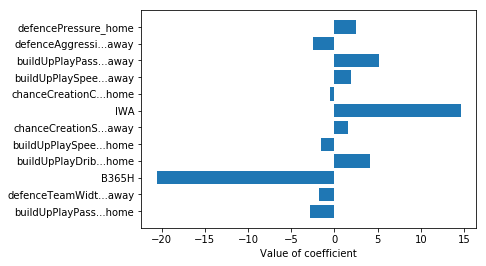

In [85]:
labels = [ l[:15] + "..."+l[-4:] if len(l) > 20 else l for l in greedy_selected_colname_list  ]
x = np.arange(len(lr_greedy.coef_))
plt.barh(x, lr_greedy.coef_, tick_label=labels)
plt.xlabel('Value of coefficient')
plt.savefig('lr_coef.png',bbox_inches='tight')

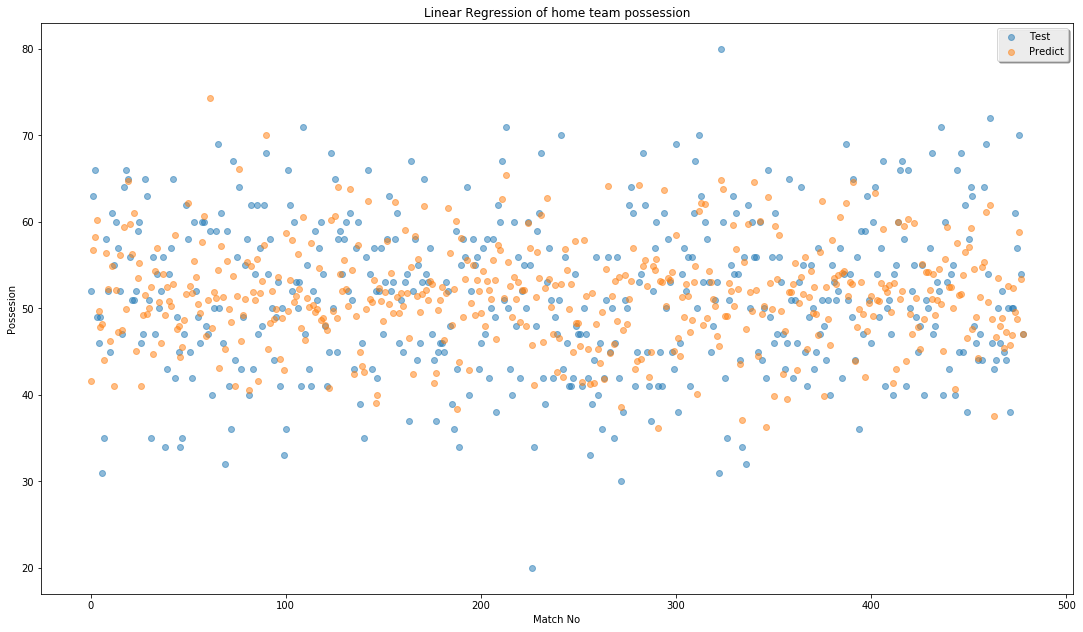

In [88]:
fig_two, axe = plt.subplots(1)
fig_two.set_size_inches(18.5, 10.5, forward=True)
width = 0.35  
length=len(df_before_match_out_testtarget.tolist())
x = np.arange(0, length, 1) #number of matches. 
#re_test_list=np.subtract(np.array(df_before_match_out_testtarget.tolist()),np.array(before_match_greedy_pred.tolist()))
axe.scatter(x,df_before_match_out_testtarget.tolist(),alpha=0.5,label='Test')
axe.scatter(x,before_match_greedy_pred.tolist(),alpha=0.5,label='Predict')
axe.set_title("Linear Regression of home team possession")
legend = axe.legend(loc='upper right', shadow=True)
plt.ylabel('Possesion')
plt.xlabel('Match No')

plt.savefig('lr_residual_model.png', bbox_inches='tight')

### Residual Plot

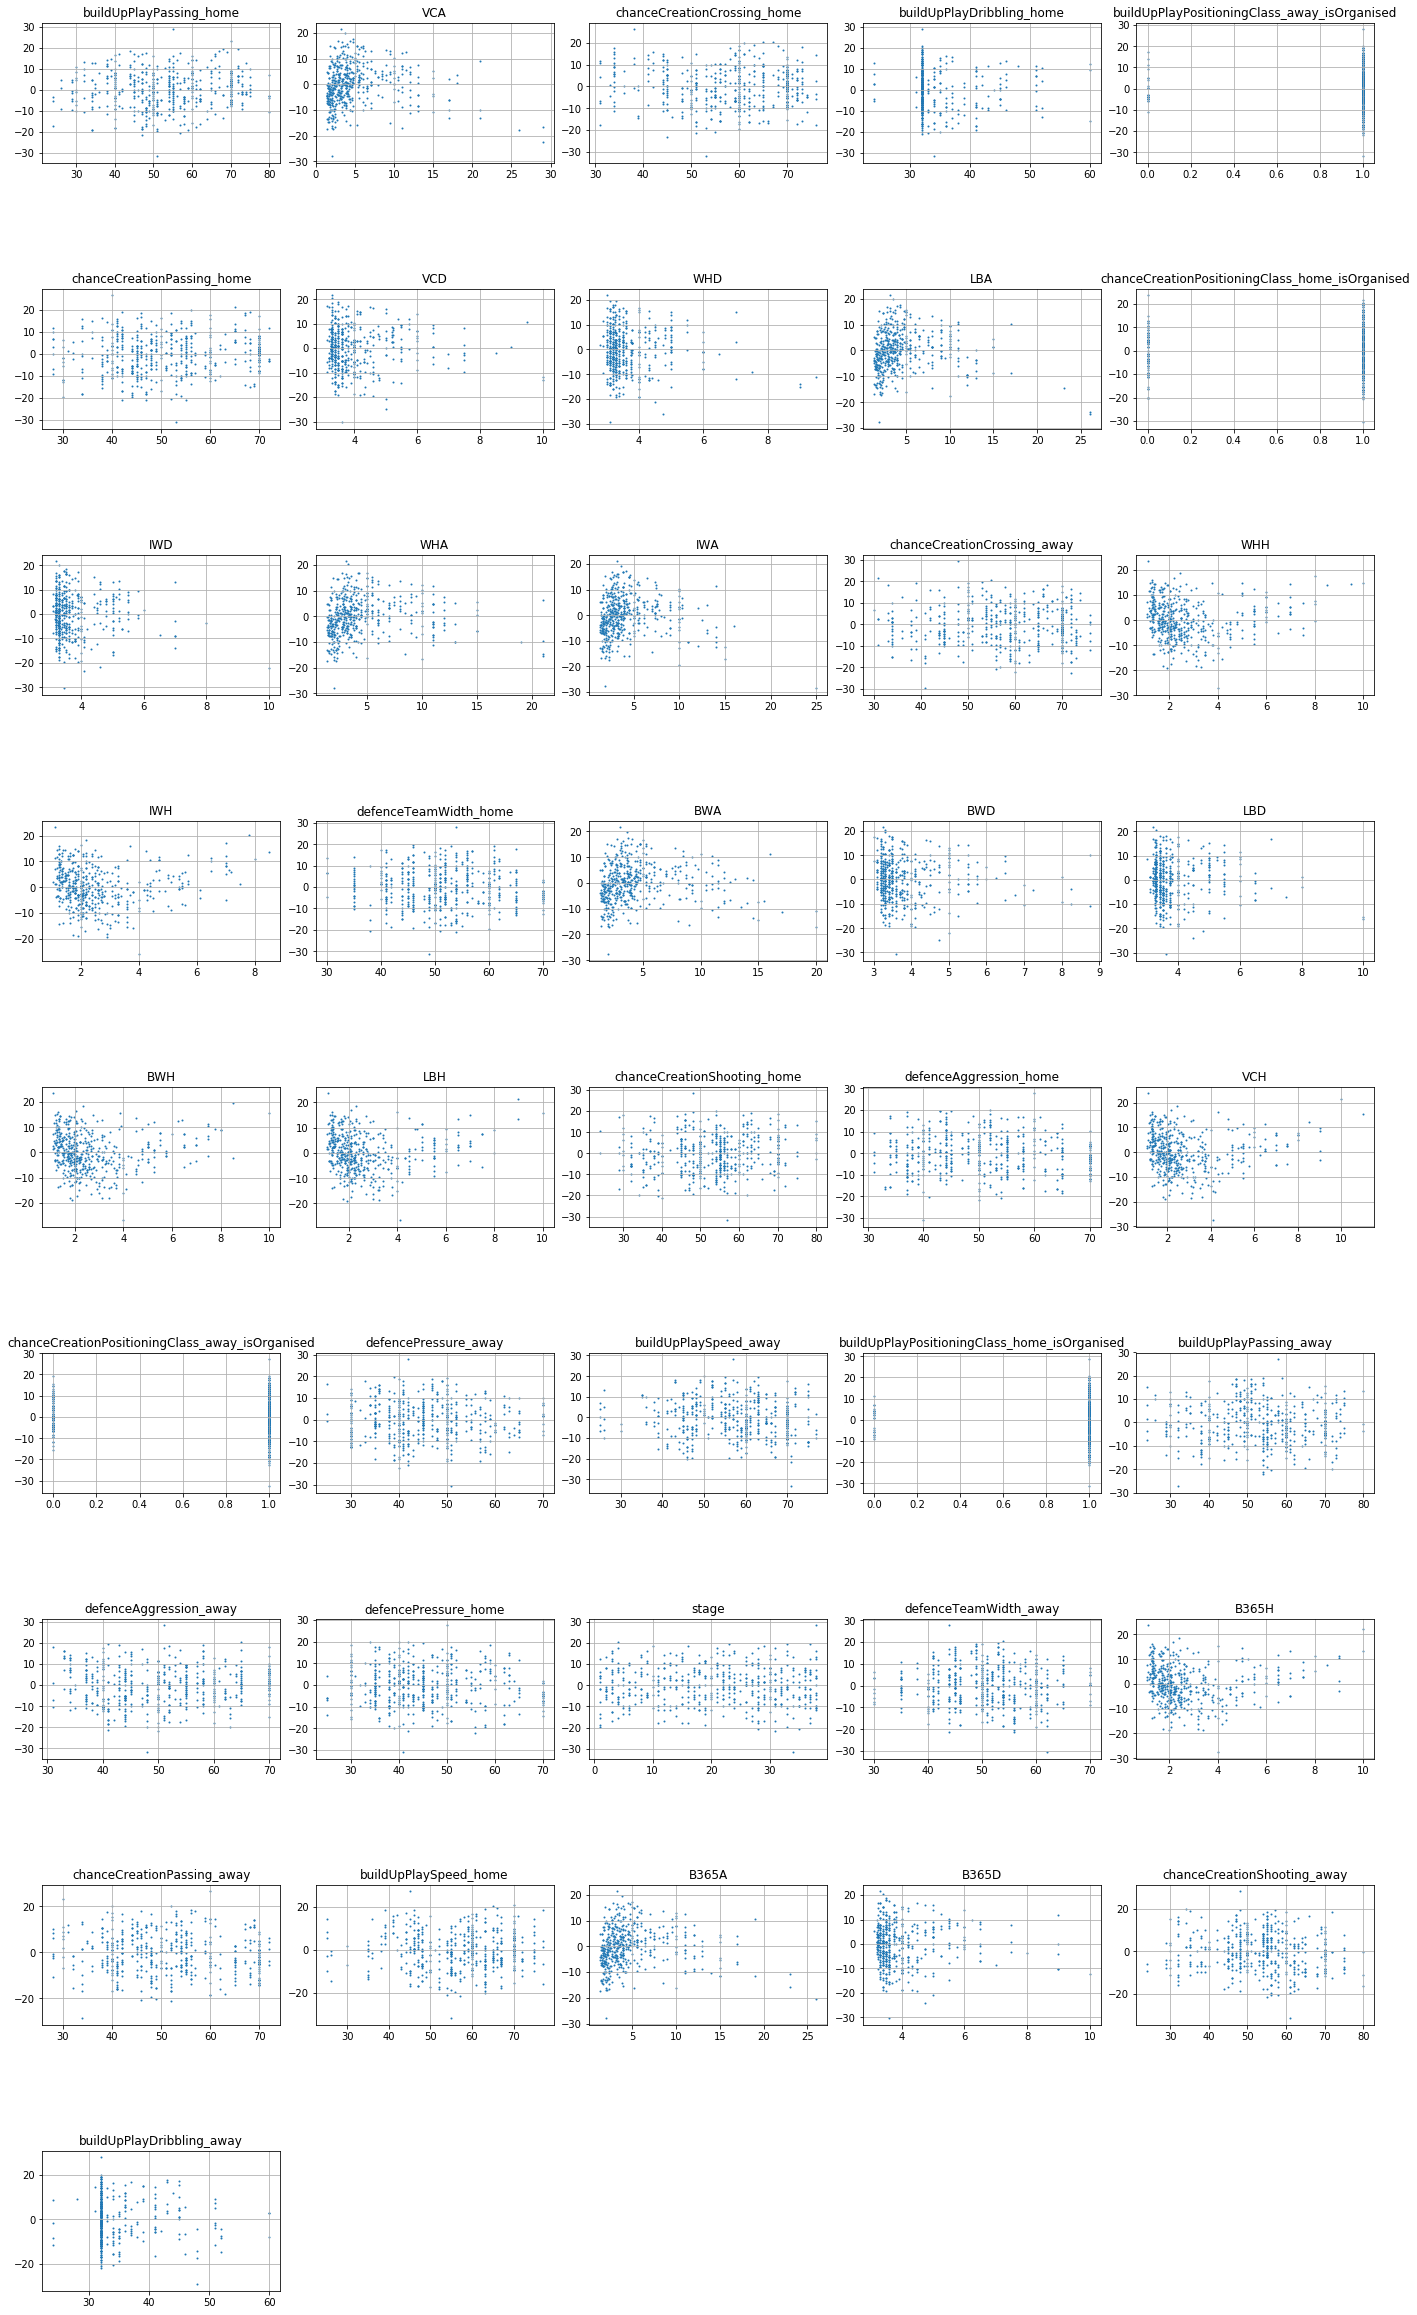

In [74]:
fig = plt.figure() 
fig.set_size_inches(18.5, 10.5, forward=True)
fig.subplots_adjust(left=0, right=1, bottom=0, top=3, hspace=0.9, wspace=0.15) 
lr = linear_model.LinearRegression()
i=0
re_erro_dict=dict()
for column in df_before_match_out_training.columns.tolist():
    lr.fit(df_before_match_out_training[column].as_matrix().reshape(df_before_match_out_training.shape[0],1), df_before_match_out_trainingtarget.as_matrix().reshape(df_before_match_out_trainingtarget.shape[0],1))
    y_pred = lr.predict(df_before_match_out_test[column].as_matrix().reshape(df_before_match_out_test.shape[0],1)).reshape(1,df_before_match_out_test.shape[0])
    re_erro = np.subtract(df_before_match_out_testtarget.as_matrix(),y_pred[0])
    re_erro_dict[column]=re_erro
    ax = fig.add_subplot(9, 5, i+1)
    ax.scatter(df_before_match_out_test[column].as_matrix(), re_erro, s=1)
    ax.grid(True)
    ax.set_title(column)
    i=i+1

plt.savefig('lr_residual_all.png',bbox_inches='tight')
plt.show() 


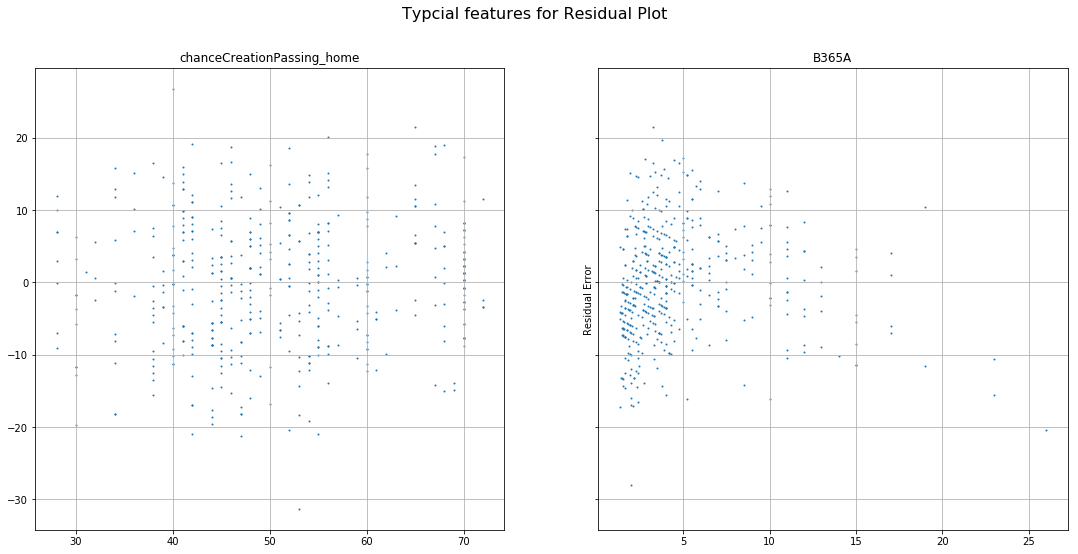

In [70]:
########this section is only for report!!!!!!!!!!!!!!!!!!!!!!!
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Typcial features for Residual Plot', fontsize=16)
f.set_size_inches(18.5, 8.5, forward=True)
ax1.scatter(df_before_match_out_test['chanceCreationPassing_home'].as_matrix(), re_erro_dict['chanceCreationPassing_home'], s=1)
ax1.grid(True)
ax1.set_title("chanceCreationPassing_home")
ax2.scatter(df_before_match_out_test['B365A'].as_matrix(), re_erro_dict['B365A'], s=1)
ax2.grid(True)
ax2.set_title("B365A")
plt.ylabel('Residual Error');
plt.savefig('lr_residual_typical.png',bbox_inches='tight')